# Assignment No: 03

Name: Mansi Sanjay Chavan

Roll No: 2447064

Batch: D

Problem Statement:
    
B. Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute
confusion matrix, accuracy, error rate, precision and recall on the given dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ads_df = pd.read_csv('Social_Network_Ads.csv')
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ads_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
ads_df.duplicated().sum()

0

In [5]:
ads_df.drop(columns=['User ID'],inplace=True)

In [6]:
ads_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
ads_df.shape

(400, 4)

In [8]:
ads_df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:>

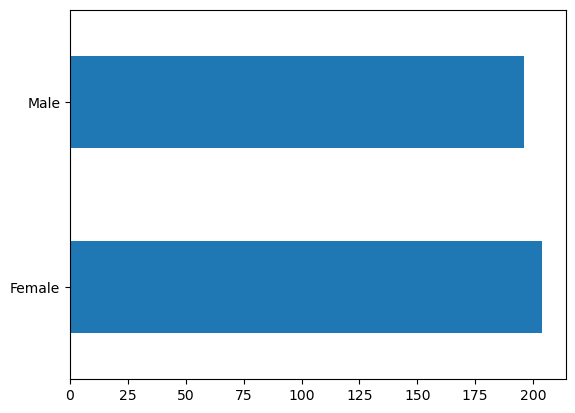

In [9]:
ads_df.Gender.value_counts().plot(kind='barh')

In [10]:
ads_df["Age"].value_counts()


35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

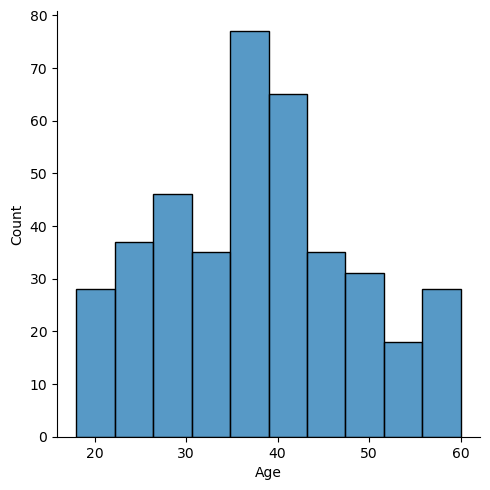

In [11]:
sns.displot(ads_df['Age'])


In [12]:
ads_df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

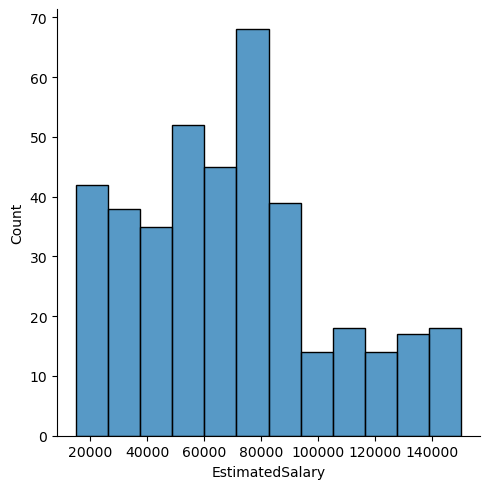

In [13]:
sns.displot(ads_df['EstimatedSalary'])

In [14]:
ads_df["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

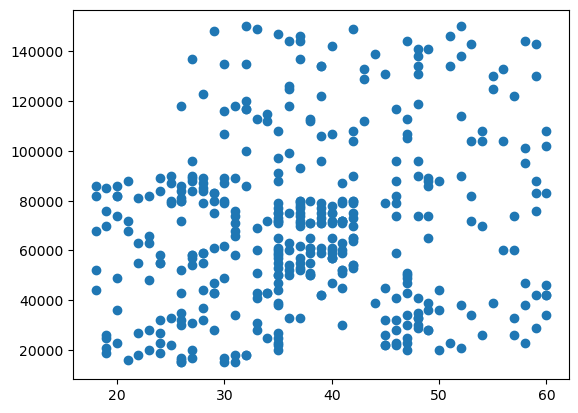

In [15]:
plt.scatter(x='Age',y='EstimatedSalary',data=ads_df)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

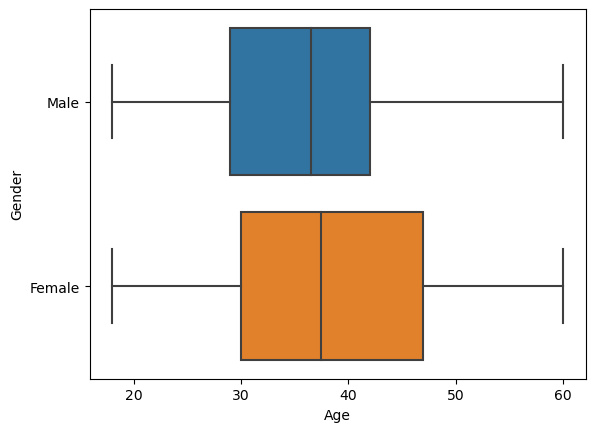

In [16]:
sns.boxplot(x='Age',y='Gender',data=ads_df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

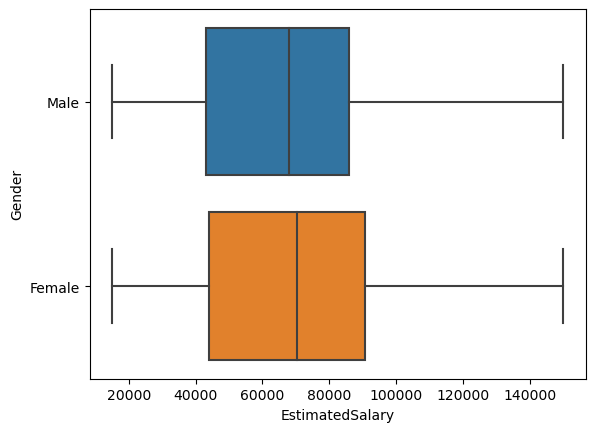

In [17]:
sns.boxplot(x='EstimatedSalary',y='Gender',data=ads_df)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

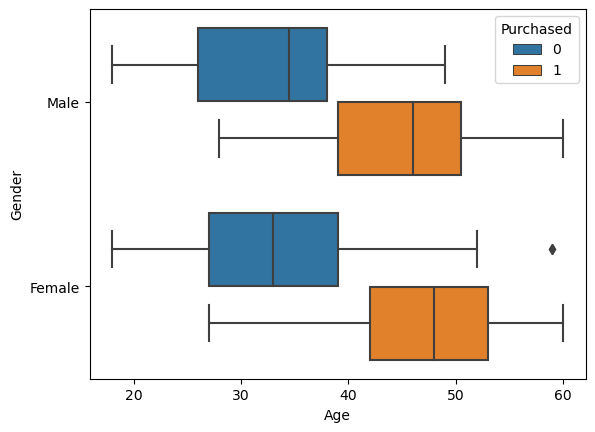

In [18]:
sns.boxplot(x='Age',y='Gender',data=ads_df, hue='Purchased')


<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

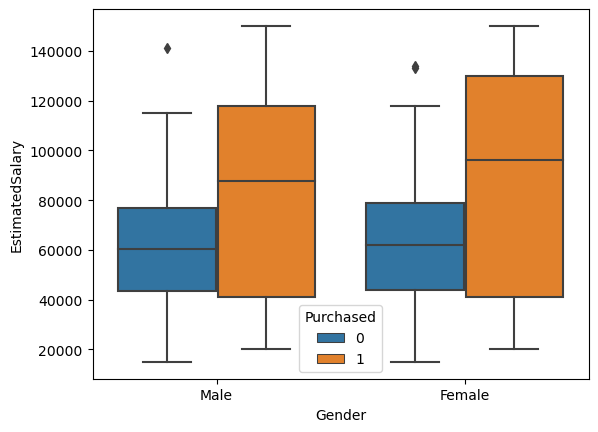

In [19]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=ads_df, hue='Purchased')


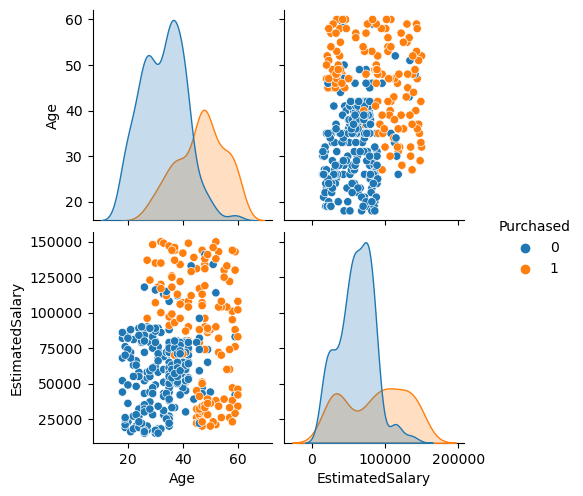

In [20]:
sns.pairplot(ads_df, hue="Purchased")


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score

In [22]:
ads_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [23]:
x = ads_df.iloc[:,:-1]
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [24]:
y = ads_df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [25]:
print('The shape of feature variable x =',x.shape)
print('The shape of target variable y =',y.shape)

The shape of feature variable x = (400, 3)
The shape of target variable y = (400,)


In [26]:
le = LabelEncoder()
x['Gender']=le.fit_transform(x.iloc[:,0])

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 7.9 KB


In [28]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [30]:
print('The shape of x_train =',x_train.shape)
print('The shape of y_train =',y_train.shape)
print('The shape of x_test =',x_test.shape)
print('The shape of y_test =',y_test.shape)

The shape of x_train = (320, 3)
The shape of y_train = (320,)
The shape of x_test = (80, 3)
The shape of y_test = (80,)


In [31]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [32]:
x_train = pd.DataFrame(x_train)
x_train.describe()

,0,1,2
count,320.000000,3.200000e+02,3.200000e+02
mean,0.000000,-2.525757e-16,9.367507e-18
std,1.001566,1.001566e+00,1.001566e+00
min,-1.000000,-1.949836e+00,-1.608102e+00
25%,-1.000000,-7.723913e-01,-7.935968e-01
50%,0.000000,-8.554870e-02,2.090805e-02
75%,1.000000,6.994143e-01,5.154289e-01
max,1.000000,2.171220e+00,2.318975e+00


In [33]:
x_test = pd.DataFrame(x_test)
x_test.describe()

,0,1,2
count,80.000000,80.000000,80.000000
mean,-0.100000,-0.106399,-0.078360
std,1.001265,1.132999,0.955593
min,-1.000000,-1.949836,-1.491744
25%,-1.000000,-0.968632,-0.800869
50%,-1.000000,-0.232729,-0.153629
75%,1.000000,0.895655,0.384526
max,1.000000,2.171220,2.144439


In [34]:
#Building the KNN model
knn_model = KNeighborsClassifier()
#Training the model
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
knn_training_score = knn_model.score(x_train, y_train)*100
print('Training Score of KNN Model =',knn_training_score,'%')

Training Score of KNN Model = 91.25 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
y_pred_knn = knn_model.predict(x_test)
y_pred_knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [37]:
knn_testing_score = knn_model.score(x_test, y_test)*100
print('Testing Score of KNN Model =',knn_testing_score,'%')

Testing Score of KNN Model = 92.5 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
knn_acc_score = accuracy_score(y_test,y_pred_knn)*100
print('Accuracy of the KNN model =',knn_acc_score,'%')

Accuracy of the KNN model = 92.5 %


In [39]:
knn_mse = mean_squared_error(y_test,y_pred_knn)*100
print('Error in the KNN model =',knn_mse,'%')

Error in the KNN model = 7.5 %


In [40]:
knn_precision = precision_score(y_test,y_pred_knn)*100
print('Precision of the KNN model =',knn_precision)

Precision of the KNN model = 86.66666666666667


In [41]:
knn_recall = recall_score(y_test,y_pred_knn)*100
print('Recall of the KNN model =',knn_recall)

Recall of the KNN model = 92.85714285714286
